# <center>Лабораторна робота №2</center>
## <center>Використання Pandas для аналізу даних</center>
### Мета: Вивчення основних функцій Pandas для аналізу даних.
### Завдання:
1. Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com (https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)
2. Виконайте вправи по варіантах. Для розрахунку номеру варіанту скористуватися формулою:  
   `N = (n + 4) % 5 + 1` , де `N` – номер варіанту, `n` – 
номер у списку групи.

### <center>Хід роботи</center>
Для вибору номеру варіанта використовуємо оператор `N = (n + 4) % 5 + 1`, де `n` – номер у списку групи.

In [1]:
N = (6 + 4) % 5 + 1
print(N)

1


В даному випадку отримаємо **варіант №1**:  
|<h4>Варіант</h4>|<h4>Номери вправ</h4>|
|-------|------------|
|<h5>1</h5>|<h5>1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26</h5>|3, 24, 26|

Спочатку отримуємо дані про імена з файлу `NationalNames.csv`:

In [2]:
import pandas as pd
df = pd.read_csv('NationalNames.csv')

1. Виведіть перші 8 рядків набору даних.

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


2. Вивести останні 8 рядків набору даних.

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


3. Отримайте імена стовпців набору даних.

In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

5. Знайдіть кількість унікальних імен у наборі даних.

In [6]:
df['Name'].nunique()

93889

10. Підрахуйте кількість унікальних імен у кожному році.

In [7]:
unique_names_by_year = df.groupby(['Year'])[['Name']].nunique()
unique_names_by_year.head()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158


11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [8]:
year_with_most_unique_names = unique_names_by_year.loc[unique_names_by_year.idxmax()]
year_with_most_unique_names

,Name
Year,
2008,32488


12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних 
імен (тобто у 2008 році.)

In [9]:
data_2008 = df[df['Year'] == year_with_most_unique_names.index[0]]
most_popular_name_2008 = data_2008[data_2008['Count'] == data_2008['Count'].max()]['Name'].values[0]
most_popular_name_2008

'Jacob'

13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен.

In [10]:
data_Jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
year_with_most_Jacob_female = data_Jacob_female.loc[data_Jacob_female[['Count']].idxmax()]
year_with_most_Jacob_female

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена).

In [11]:
year_name_count = df.groupby(['Year', 'Name'])[['Name']].transform('count')
df['Gender_neutral_names'] = (df['Gender'] == 'M') & (year_name_count['Name'] > 1)
gender_neutral_counts = df.groupby(['Year'])[['Gender_neutral_names']].sum()
max_gender_neutral_year = gender_neutral_counts.loc[gender_neutral_counts.idxmax()]
max_gender_neutral_year

,Gender_neutral_names
Year,
2008,2557


15. Знайдіть загальну кількість народжень за рік.

In [12]:
total_number_births_per_year = df.groupby(['Year'])[['Count']].sum()
total_number_births_per_year.head()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


16. Знайдіть рік, коли народилося найбільше дітей.

In [13]:
max_number_births_year = total_number_births_per_year.idxmax()
max_number_births_year.item()

1957

17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.

In [14]:
gender_counts_per_year = df.groupby(['Year', 'Gender'])[['Count']].sum().unstack()
gender_counts_per_year.columns = gender_counts_per_year.columns.droplevel()
gender_counts_per_year.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [15]:
gender_counts_per_year['More_Female'] = gender_counts_per_year['F'] > gender_counts_per_year['M']
count_more_female_years = gender_counts_per_year['More_Female'].sum()
count_more_female_years

54

21. Порахуйте, скільки разів хлопчиків називали Barbara.

In [16]:
barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
barbara_male_count

4139

22. Підрахуйте скільки років проводилось спостереження.

In [17]:
years_count = df['Year'].nunique()
print(f'Спостереження проводилось {years_count} років')

Спостереження проводилось 135 років


23. Знайти найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року).

In [18]:
unique_names_count = pd.DataFrame(df[['Name']].value_counts().reset_index())
most_popular_gender_neutral_names = unique_names_count[unique_names_count['count'] == years_count * 2][['Name']]
most_popular_gender_neutral_names

,Name
0,James
1,Leslie
2,Joseph
3,Jessie
4,Jesse
5,Sidney
6,John
7,Robert
8,Tommie
9,Jean


24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів).

In [19]:
# Нехай непопулярні ім'я - у яких 'Count' < 5000

total_names_count = df.groupby(['Name'])['Count'].sum().reset_index()
unpopular_names = total_names_count[total_names_count['Count'] < 5000]
most_popular_unpopular = unpopular_names.loc[unpopular_names['Count'].idxmax()]

print(f'Найпопулярніше серед непопулярних імен - це {most_popular_unpopular['Name']}. Ним називали {most_popular_unpopular['Count']} разів.')

Найпопулярніше серед непопулярних імен - це Shira. Ним називали 4996 разів.


26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

<Axes: xlabel='Year'>

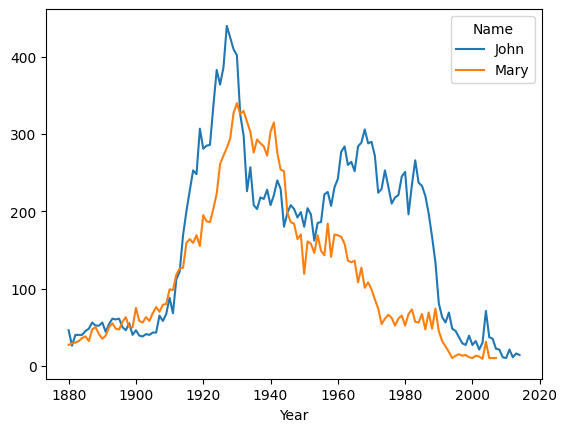

In [20]:
john_mary_data = df[((df['Name'] == 'John') & (df['Gender'] == 'F')) | ((df['Name'] == 'Mary') & (df['Gender'] == 'M'))]
john_mary_data = john_mary_data.groupby(['Name', 'Year'])['Count'].sum().unstack().T
john_mary_data.plot()

### <center>Висновки</center>
В результаті виконання лабораторної роботи були отримані теоретичні знання та базові навики використання Pandas для аналізу даних. За допомогою основних функцій бібліотеки Pandas була виконана робота з аналізу даних структур Series та DataFrame, а саме пошук, вибір, підрахунок конкретних даних, а також їх візуалізація за допомогою графіка. Ці навички є дуже корисними для подальшої роботи з дуже великими таблицями даних.

#### <center>Посилання на [GitHub](https://github.com/Tryba-dyp/Python_labs_2023)</center>